<a href="https://colab.research.google.com/github/asosialuk/Plant-Detection/blob/main/plant_detecion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install opendatasets
!pip install opendatasets

In [26]:
#import libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import seaborn as sns

In [4]:
#kaggle dataset download
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [ ]:
#just for info{"username":"alicjasosialuk","key":"fa69bfa4724b0a10006ba687db303759"}

In [5]:
#path to datasets
data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
data_dir_val = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
data_dir_test = './new-plant-diseases-dataset/test/test'

In [36]:
#listing the folders
os.listdir(data_dir_train)

['Corn_(maize)___Common_rust_',
 'Tomato___Target_Spot',
 'Tomato___Late_blight',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Apple___Black_rot',
 'Tomato___Septoria_leaf_spot',
 'Apple___Apple_scab',
 'Strawberry___Leaf_scorch',
 'Tomato___Leaf_Mold',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Apple___healthy',
 'Pepper,_bell___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Potato___healthy',
 'Blueberry___healthy',
 'Peach___Bacterial_spot',
 'Soybean___healthy',
 'Apple___Cedar_apple_rust',
 'Cherry_(including_sour)___healthy',
 'Peach___healthy',
 'Corn_(maize)___healthy',
 'Potato___Late_blight',
 'Cherry_(including_sour)___Powdery_mildew',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Raspberry___healthy',
 'Tomato___Early_blight',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Bacterial_spot',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Squash___Powdery_mildew',
 'Potato___Early_blight',
 'Grape___Black_ro

In [ ]:
# showing some random photos for the quality check - Strawberry Leaf scorch
plt.figure(figsize=(12,12))
#path = data_dir
for i in range(1,17):
    data_dir = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch'
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(data_dir +'/'+ random.choice(sorted(os.listdir(data_dir))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [40]:
#creation of the data frame with the info
import pandas as pd
data = []

for directory in os.listdir(data_dir_train):
    columns = directory.split('___')
    columns.append(directory)

    sub_path = data_dir_train + '/' + directory
    columns.append(len([name for name in os.listdir(path=sub_path)]))

    data.append(columns)

data = pd.DataFrame(data, columns=['Plant', 'Disease', 'Directory', 'Files'])
data.sort_values(by='Plant')

,Plant,Disease,Directory,Files
18,Apple,Cedar_apple_rust,Apple___Cedar_apple_rust,1760
4,Apple,Black_rot,Apple___Black_rot,1987
6,Apple,Apple_scab,Apple___Apple_scab,2016
11,Apple,healthy,Apple___healthy,2008
15,Blueberry,healthy,Blueberry___healthy,1816
23,Cherry_(including_sour),Powdery_mildew,Cherry_(including_sour)___Powdery_mildew,1683
19,Cherry_(including_sour),healthy,Cherry_(including_sour)___healthy,1826
27,Corn_(maize),Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,1642
21,Corn_(maize),healthy,Corn_(maize)___healthy,1859
0,Corn_(maize),Common_rust_,Corn_(maize)___Common_rust_,1907


In [43]:
#Total of pictures
data['Files'].sum()

70295

<Axes: xlabel='Plant'>

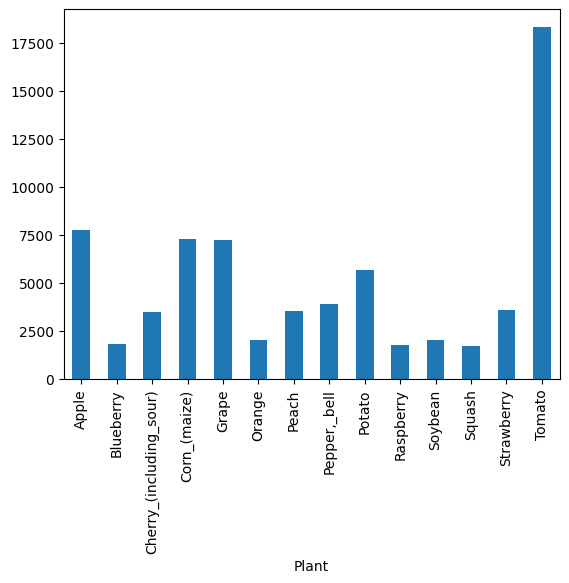

In [42]:
data.groupby('Plant')['Files'].sum().plot(kind='bar')


<ipython-input-41-41ba6c60a9aa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['Plant', 'Disease']).sum().reset_index()


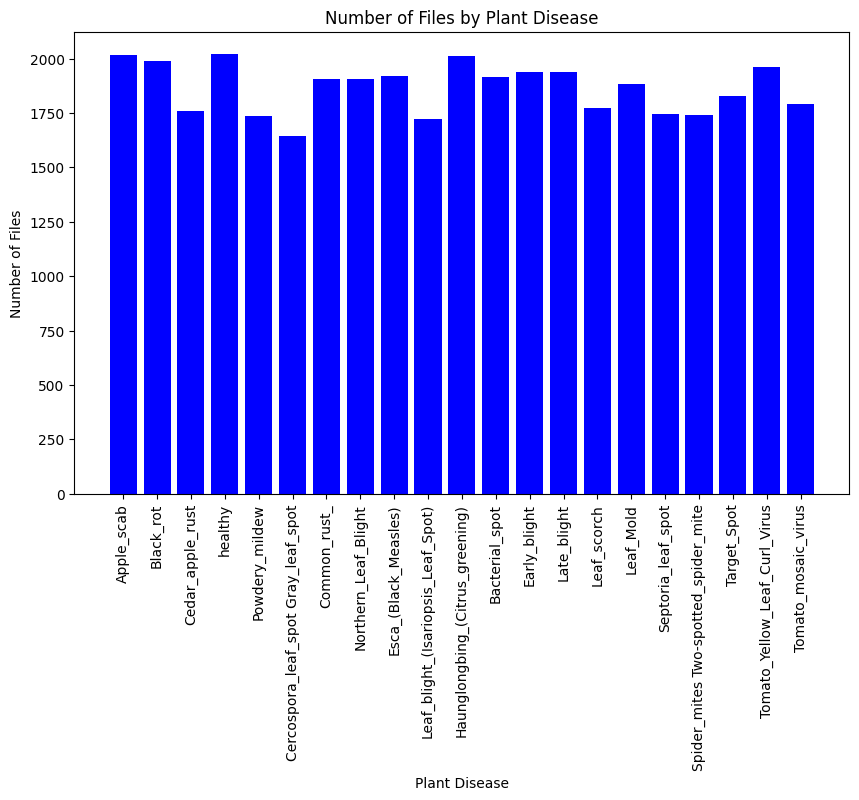

In [41]:
grouped_data = data.groupby(['Plant', 'Disease']).sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Disease'], grouped_data['Files'], color='blue')
plt.title('Number of Files by Plant Disease')
plt.xlabel('Plant Disease')
plt.ylabel('Number of Files')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#showing random pictures from the folder _train
plt.figure(figsize=(12,12))

#data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

folders = sorted(os.listdir(data_dir_train))

for i, folder in enumerate(folders):
    plt.subplot(4, 4,i+1)
    plt.tight_layout()
    image_file = os.path.join(data_dir_train, folder, os.listdir(os.path.join(data_dir_train, folder))[0])
    image = imread(image_file)
    plt.imshow(image)
    plt.xlabel(image.shape[1], fontsize=10)  # width of image
    plt.ylabel(image.shape[0], fontsize=10)  # height of image
    plt.title(folder)

plt.show()

In [30]:
#function - Resize, converting to gray
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
#It is crashing, does not work
root_dir = listdir(data_dir_train)
image_list, label_list = [], []
all_labels = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']
binary_labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{data_dir_train}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{data_dir_train}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])